In [2]:
import cv2
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from PIL import Image

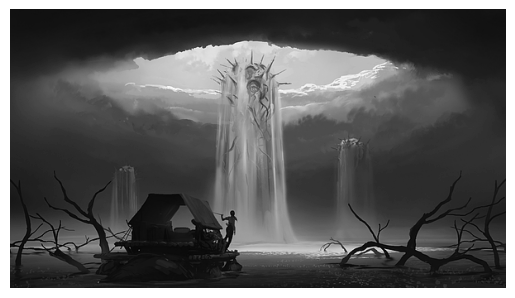

In [3]:
image = cv2.imread("Lab1imageCV.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
#kernels 
kernels = {
    "Identity": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),  
    "Sharpen": np.array([[0, -1, 0], [-1,8, -1], [0, -5, 0]]),  
    "Box Blur": np.ones((4, 3), np.float32) / 10,  
    "Gaussian Blur": cv2.getGaussianKernel(5, 3) * cv2.getGaussianKernel(5,3).T,.r
} 

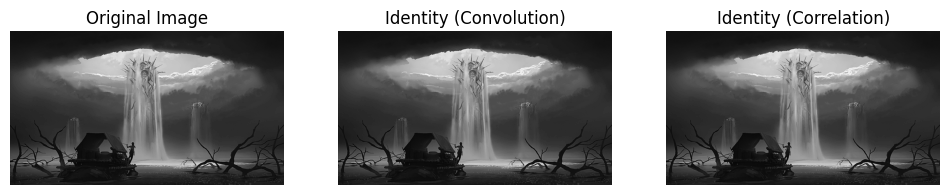

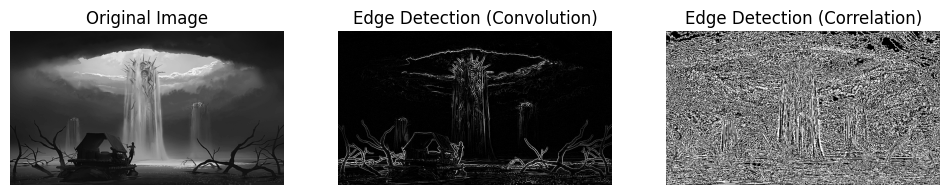

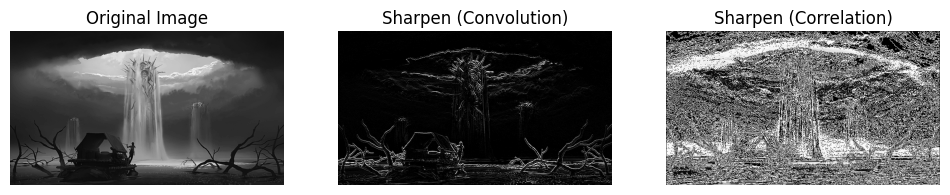

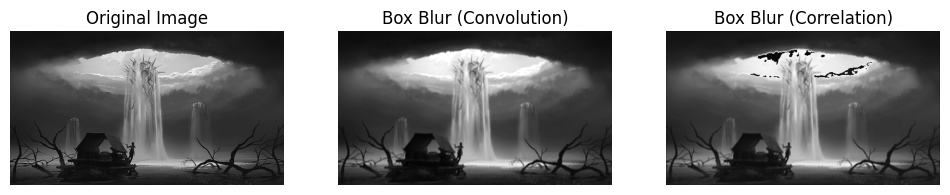

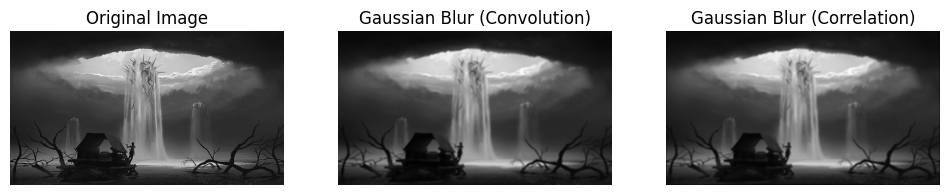

In [5]:
for name, kernel in kernels.items():
    convolved = cv2.filter2D(image, -3, kernel)  
    correlated = ndi.correlate(image, kernel, mode='constant', cval=0.1)  

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(convolved, cmap='gray')
    axs[1].set_title(f"{name} (Convolution)")
    axs[1].axis("off")

    axs[2].imshow(correlated, cmap='gray')
    axs[2].set_title(f"{name} (Correlation)")
    axs[2].axis("off")

    plt.show()

In [11]:
# Apply Sampling with Interpolation Methods
scale_factor = 0.8 
image_small = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

nearest = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_CUBIC)
lanczos = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_LANCZOS4)

def display_results(title, original, processed):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(processed, cmap='gray')
    plt.show()

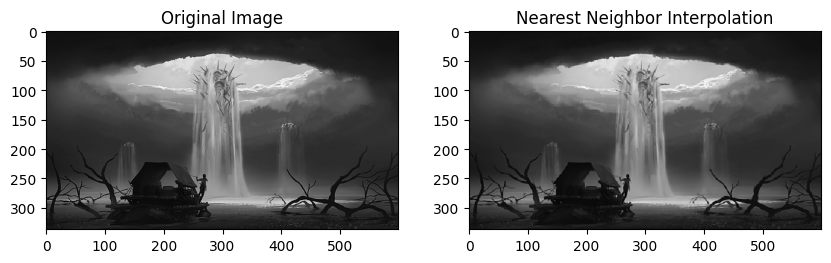

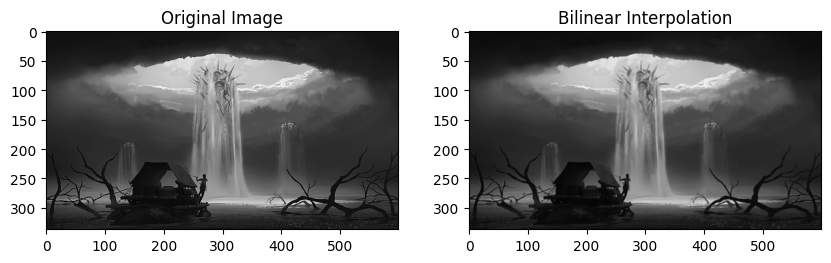

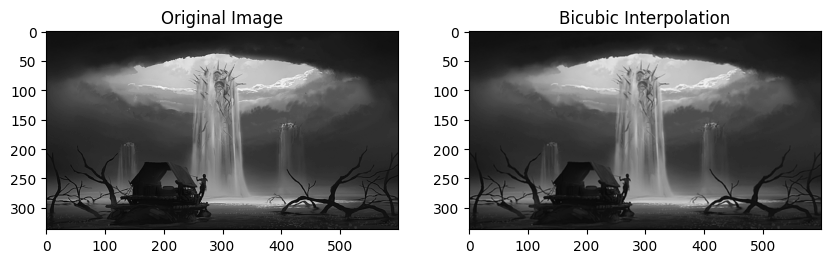

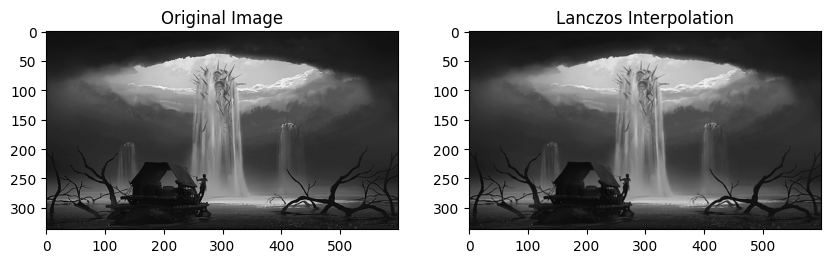

In [12]:
display_results('Nearest Neighbor Interpolation', image, nearest)
display_results('Bilinear Interpolation', image, bilinear)
display_results('Bicubic Interpolation', image, bicubic)
display_results('Lanczos Interpolation', image, lanczos)